In [126]:
# Test for å tegne tilbud og etterspørsel i hotellmarkedet for Nord-Norge

# Importing all packages needed for the project
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from pyjstat import pyjstat
import matplotlib.ticker as ticker
from matplotlib.image import imread
import sympy as sp
import statsmodels as sm

In [127]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

In [128]:
# Etterspørselen i markedet
postUrl = "https://data.ssb.no/api/v0/no/table/08403/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker2020",
        "values": [
          "18",
          "54"
        ]
      }
    },
    {
      "code": "HotellFormal",
      "selection": {
        "filter": "item",
        "values": [
          "03"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df_e, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [129]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [130]:
# Etterspørselen i markedet
postUrl = "https://data.ssb.no/api/v0/no/table/08403/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "18",
          "19",
          "20"
        ]
      }
    },
    {
      "code": "HotellFormal",
      "selection": {
        "filter": "item",
        "values": [
          "03"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df_e2, df_id, ds = apiToDataframe(postUrl, apiQuery)

df_total_e = pd.concat([df_e2, df_e])

In [131]:
# Fixing the dataset so M is replaced with -
df_total_e['year'] =df_total_e['måned'].str.replace('M', '-')

# Making a copy of the dataset
df_total_e= df_total_e.copy()

df_total_e['year'] = pd.to_datetime(df_total_e['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
df_total_e = df_total_e.groupby(df_total_e['year'].dt.year).agg({
    'value': 'sum'
})

df_total_e=df_total_e.reset_index()

df_total_e = df_total_e.rename(columns={'value': 'demand'})

In [132]:
# Tilbudet i markedet
postUrl = "https://data.ssb.no/api/v0/no/table/13153/"

# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "RomHyttLeil"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [133]:
# Fixing the dataset so M is replaced with -
df['year'] =df['måned'].str.replace('M', '-')

# Making a copy of the dataset
df= df.copy()

df['year'] = pd.to_datetime(df['year'], format='%Y-%m')

# Group the dataframe by year and summarize the monthly data
df = df.groupby(df['year'].dt.year).agg({
    'value': 'sum'
})

df=df.reset_index()

df = df.rename(columns={'value': 'supply'})

In [134]:
# Merge the two datasets
df_total = pd.merge(df_total_e, df, on='year')

In [135]:
df_total['lndemand']=np.log(df_total['demand'])
df_total['lnsupply']=np.log(df['supply'])
df_total['demand'] = df_total['demand'] / 10

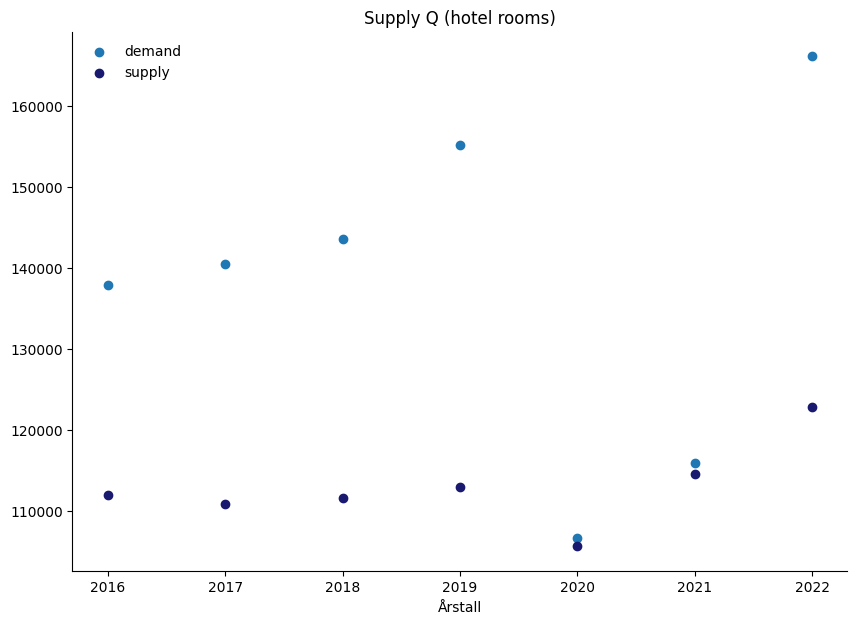

In [136]:
p_num=np.linspace(0.1,9.9,100)

fig, ax = plt.subplots(figsize=(10,7))

# plott av linjene
ax.scatter(df_total['year'], df_total['demand'], label='demand')
ax.scatter(df_total['year'], df_total['supply'], label='supply', color='midnightblue')



# bruk løkke for å tegne aksene

for i in range(1):

    ax.set_xlabel('Årstall')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.legend(loc='best', frameon=False)

# titte
# fix so its not in scientific notation
ax.ticklabel_format(axis='y', style='plain')
ax.set_title('Demand (NOK)')
ax.set_title('Supply Q (hotel rooms)')

plt.show()

In [137]:
from numpy import random as rd
import pandas as pd

samp_size=7

K_obs = np.exp(rd.normal(3, 1, samp_size))

df_total['dummy_var'] = rd.random(size=samp_size)
df_total['dummy_varln'] =np.log(df_total['dummy_var'])

df_total

,year,demand,supply,lndemand,lnsupply,dummy_var,dummy_varln
0,2016,137887.6,112010,14.136779,11.626343,0.825282,-0.192030
1,2017,140503.5,110891,14.155573,11.616303,0.184124,-1.692147
2,2018,143581.2,111664,14.177241,11.623250,0.125354,-2.076615
3,2019,155160.5,112983,14.254800,11.634993,0.285754,-1.252624
4,2020,106687.0,105677,13.880240,11.568143,0.179867,-1.715540
5,2021,115925.9,114564,13.963292,11.648889,0.306942,-1.181098
6,2022,166170.7,122903,14.323356,11.719151,0.704438,-0.350355


In [144]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
mod = smf.ols(formula='lndemand ~ lnsupply + dummy_varln', data=df_total)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:               lndemand   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     1.946
Date:                Wed, 22 Mar 2023   Prob (F-statistic):              0.257
Time:                        11:56:44   Log-Likelihood:                 5.9910
No. Observations:                   7   AIC:                            -5.982
Df Residuals:                       4   BIC:                            -6.144
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -16.4531     18.030     -0.913      

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [146]:
mod = smf.ols(formula='lnsupply ~ lndemand + dummy_varln', data=df_total)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:               lnsupply   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     3.460
Date:                Wed, 22 Mar 2023   Prob (F-statistic):              0.134
Time:                        11:57:47   Log-Likelihood:                 15.787
No. Observations:                   7   AIC:                            -25.57
Df Residuals:                       4   BIC:                            -25.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.4070      1.337      7.038      

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Implikasjon: dersom jeg har en serie med kvantum etterspurt, og en serie med prisobservasjoner, så kan jeg estimere likning (1). Estimatene for likning 1 er hentet fra en regresjonsanalyse av dataene.

$$ X^D = -16 + 2.62P\tag{2}.$$

og

$$ X^S = 9.4 - 0.1599D\tag{2}.$$

Tallet foran $ln(p)$ er etterspørselselastisiteten, dvs en 1% økning i pris fører til en 2.42% oppgang i etterspørsel.    

In [148]:
P= df_total['supply']
Q= df_total['demand']
def supply(P):
    return -16+2.6*P


def demand(P):
    return 9.4-0.15*P

WASTE OF TIME

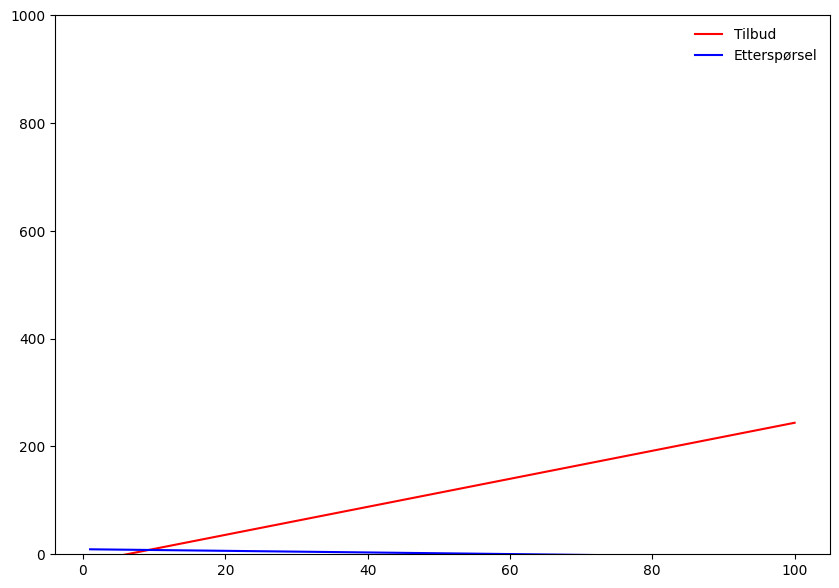

In [150]:
Q_num = np.linspace(1,100,100)

fig, ax = plt.subplots(figsize=(10,7))

# plott funksjonene

ax.plot(Q_num,supply(Q_num),label='Tilbud', color='red')
ax.plot(Q_num,demand(Q_num),label='Etterspørsel', color='blue')
# tittel
ax.set_title('')
ax.set(ylim=(0,1000))
#vis navnene:
ax.legend(loc='best',frameon=False);